# 800_RQ1_Analysis 


In [320]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
import matplotlib as mpl
%matplotlib inline

In [321]:
np.random.seed(0)

In [322]:
RQ1 = pd.read_csv('../../data/analysis/RQ1.csv')

In [323]:
RQ1 = RQ1.drop(RQ1.columns[[0]], axis=1)

In [324]:
RQ1.head(5)

,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,fan's_favourite_trait,Homegrown,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form
0,Lionel Messi,Forward,FC Barcelona,Spanish Primera Division,30,Argentina,93,https://cdn.sofifa.org/18/players/158023.png,False,False,False,42.00,8.255952,32.0,7.375000
1,Cristiano Ronaldo,Forward,Real Madrid CF,Spanish Primera Division,32,Portugal,94,https://cdn.sofifa.org/18/players/20801.png,False,False,False,41.00,7.926829,25.0,7.280000
2,Luis Suarez,Forward,FC Barcelona,Spanish Primera Division,30,Uruguay,92,https://cdn.sofifa.org/18/players/176580.png,False,False,False,41.25,7.018182,28.0,6.535714
3,Zlatan Ibrahimovic,Forward,Manchester United,English Premier League,35,Sweden,88,https://cdn.sofifa.org/18/players/41236.png,False,False,False,37.50,6.900000,5.0,1.200000
4,Robert Lewandowski,Forward,FC Bayern Munich,German Bundesliga,28,Poland,91,https://cdn.sofifa.org/18/players/188545.png,False,False,False,40.00,6.050000,28.0,6.785714


## Goalkeepers

In [325]:
RQ1_Goalkeepers = RQ1[RQ1['Position'] == 'Goalkeeper']

In [326]:
average_goalkeepers = RQ1_Goalkeepers[RQ1_Goalkeepers['overall']<85]
worldclass_goalkeepers = RQ1_Goalkeepers[RQ1_Goalkeepers['overall']>84]

In [327]:
w = average_goalkeepers['overall'].values[:,np.newaxis]
z = average_goalkeepers['Previous Average Form'].values
average_goalkeepers_model = LinearRegression()
average_goalkeepers_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [328]:
x = worldclass_goalkeepers['overall'].values[:,np.newaxis]
y = worldclass_goalkeepers['Previous Average Form'].values
worldclass_goalkeepers_model = LinearRegression()
worldclass_goalkeepers_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [329]:
average_goalkeepers["Distance"] = average_goalkeepers['Previous Average Form'].values - average_goalkeepers_model.predict(average_goalkeepers['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [330]:
worldclass_goalkeepers["Distance"] = worldclass_goalkeepers['Previous Average Form'].values - worldclass_goalkeepers_model.predict(worldclass_goalkeepers['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [331]:
pos_dist_gk0 = average_goalkeepers[average_goalkeepers['Distance']>=0]['Distance'].mean()
pos_dist_gk1 = worldclass_goalkeepers[worldclass_goalkeepers['Distance']>=0]['Distance'].mean()

In [332]:
neg_dist_gk0 = average_goalkeepers[average_goalkeepers['Distance']<0]['Distance'].mean()
neg_dist_gk1 = worldclass_goalkeepers[worldclass_goalkeepers['Distance']<0]['Distance'].mean()

In [333]:
underrated_average_gk = average_goalkeepers[average_goalkeepers['Distance']>(pos_dist_gk0*2)]
underrated_worldclass_gk = worldclass_goalkeepers[worldclass_goalkeepers['Distance']>pos_dist_gk1]

In [334]:
overrated_average_gk = average_goalkeepers[average_goalkeepers['Distance']<(neg_dist_gk0*2)]
overrated_worldclass_gk = worldclass_goalkeepers[worldclass_goalkeepers['Distance']<neg_dist_gk1]

In [335]:
underrated_average_gk['Predicted Form'] = average_goalkeepers_model.predict(underrated_average_gk['overall'].values[:,np.newaxis])
underrated_worldclass_gk['Predicted Form'] = worldclass_goalkeepers_model.predict(underrated_worldclass_gk['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [336]:
overrated_average_gk['Predicted Form'] = average_goalkeepers_model.predict(overrated_average_gk['overall'].values[:,np.newaxis])
overrated_worldclass_gk['Predicted Form'] = worldclass_goalkeepers_model.predict(overrated_worldclass_gk['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [337]:
underrated_goalkeepers = pd.concat([underrated_average_gk ,underrated_worldclass_gk ],axis=0)

In [338]:
overrated_goalkeepers = pd.concat([overrated_average_gk ,overrated_worldclass_gk ],axis=0)

In [339]:
ag1 = underrated_average_gk['overall'].values[:,np.newaxis] 
ag2 = underrated_average_gk['Previous Average Form'].values 
ag3 = overrated_average_gk['overall'].values[:,np.newaxis] 
ag4 = overrated_average_gk['Previous Average Form'].values 

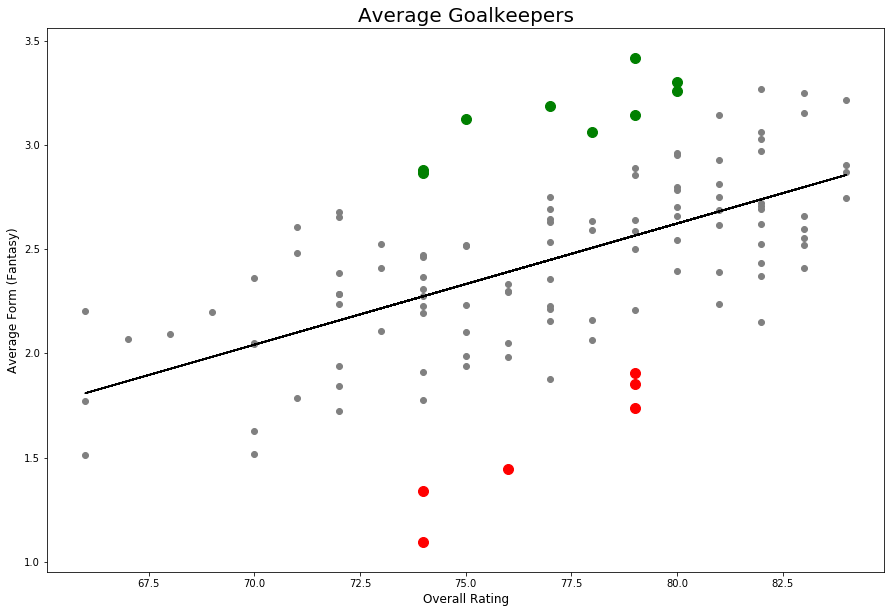

In [340]:
plt.figure(figsize=(15,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(ag1, ag2,color='green',s=100) 
plt.scatter(ag3, ag4,color='red',s=100) 
plt.plot(w, average_goalkeepers_model.predict(w),color='k') 
plt.title('Average Goalkeepers', fontsize=20)
plt.xlabel("Overall Rating", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show() 

In [341]:
wg1 = underrated_worldclass_gk['overall'].values[:,np.newaxis] 
wg2 = underrated_worldclass_gk['Previous Average Form'].values 
wg3 = overrated_worldclass_gk['overall'].values[:,np.newaxis] 
wg4 = overrated_worldclass_gk['Previous Average Form'].values

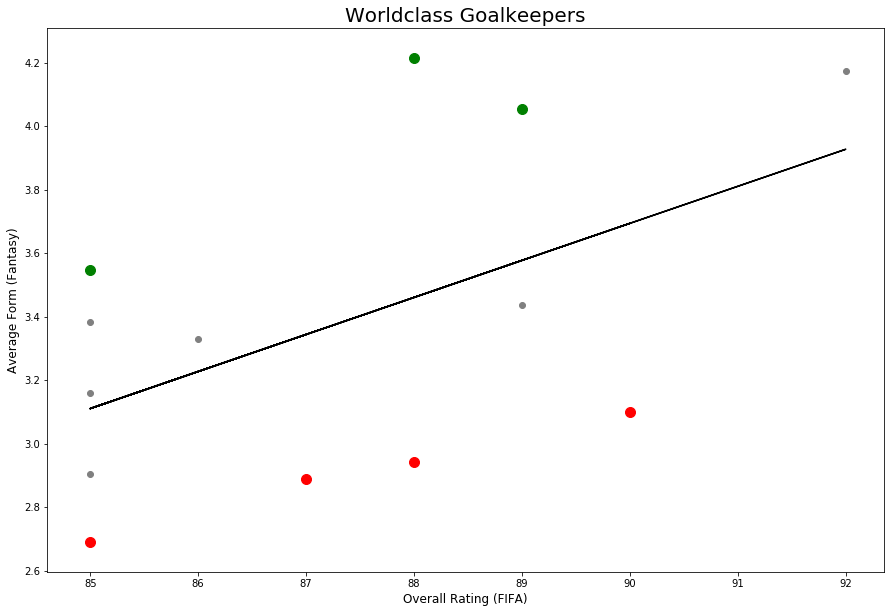

In [342]:
plt.figure(figsize=(15,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(wg1, wg2,color='green',s=100) 
plt.scatter(wg3, wg4,color='red',s=100) 
plt.plot(x, worldclass_goalkeepers_model.predict(x),color='k') 
plt.title('Worldclass Goalkeepers', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show()

## Defenders

In [343]:
RQ1_Defenders = RQ1[RQ1['Position'] == 'Defender']

In [344]:
average_defenders = RQ1_Defenders[RQ1_Defenders['overall']<85]
worldclass_defenders = RQ1_Defenders[RQ1_Defenders['overall']>84]

In [345]:
w = average_defenders['overall'].values[:,np.newaxis]
z = average_defenders['Previous Average Form'].values
average_defenders_model = LinearRegression()
average_defenders_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [346]:
x = worldclass_defenders['overall'].values[:,np.newaxis]
y = worldclass_defenders['Previous Average Form'].values
worldclass_defenders_model = LinearRegression()
worldclass_defenders_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [347]:
average_defenders["Distance"] = average_defenders['Previous Average Form'].values - average_defenders_model.predict(average_defenders['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [348]:
worldclass_defenders["Distance"] = worldclass_defenders['Previous Average Form'].values - worldclass_defenders_model.predict(worldclass_defenders['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [349]:
pos_dist_def0 = average_defenders[average_defenders['Distance']>=0]['Distance'].mean()
pos_dist_def1 = worldclass_defenders[worldclass_defenders['Distance']>=0]['Distance'].mean()

In [350]:
neg_dist_def0 = average_defenders[average_defenders['Distance']<0]['Distance'].mean()
neg_dist_def1 = worldclass_defenders[worldclass_defenders['Distance']<0]['Distance'].mean()

In [351]:
underrated_average_def = average_defenders[average_defenders['Distance']>(pos_dist_def0*2)]
underrated_worldclass_def = worldclass_defenders[worldclass_defenders['Distance']>pos_dist_def1]

In [352]:
overrated_average_def = average_defenders[average_defenders['Distance']<(neg_dist_def0*2)]
overrated_worldclass_def = worldclass_defenders[worldclass_defenders['Distance']<neg_dist_def1]

In [353]:
underrated_average_def['Predicted Form'] = average_defenders_model.predict(underrated_average_def['overall'].values[:,np.newaxis])
underrated_worldclass_def['Predicted Form'] = worldclass_defenders_model.predict(underrated_worldclass_def['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [354]:
overrated_average_def['Predicted Form'] = average_defenders_model.predict(overrated_average_def['overall'].values[:,np.newaxis])
overrated_worldclass_def['Predicted Form'] = worldclass_defenders_model.predict(overrated_worldclass_def['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [355]:
underrated_defenders = pd.concat([underrated_average_def ,underrated_worldclass_def ],axis=0)

In [356]:
overrated_defenders = pd.concat([overrated_average_def ,overrated_worldclass_def ],axis=0)

In [357]:
ad1 = underrated_average_def['overall'].values[:,np.newaxis] 
ad2 = underrated_average_def['Previous Average Form'].values 
ad3 = overrated_average_def['overall'].values[:,np.newaxis] 
ad4 = overrated_average_def['Previous Average Form'].values 

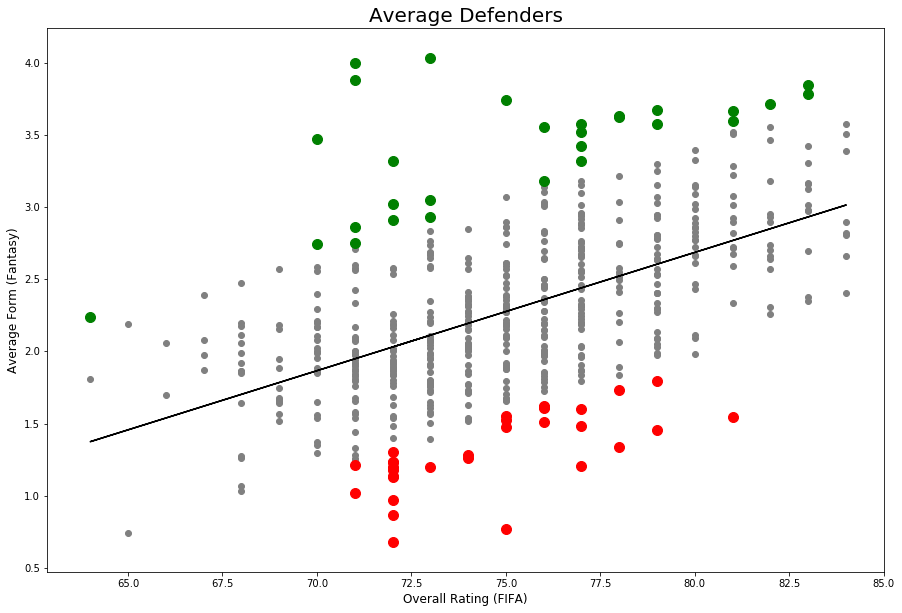

In [358]:
plt.figure(figsize=(15,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(ad1, ad2,color='green',s=100) 
plt.scatter(ad3, ad4,color='red',s=100) 
plt.plot(w, average_defenders_model.predict(w),color='k') 
plt.title('Average Defenders', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show()

In [359]:
wd1 = underrated_worldclass_def['overall'].values[:,np.newaxis] 
wd2 = underrated_worldclass_def['Previous Average Form'].values 
wd3 = overrated_worldclass_def['overall'].values[:,np.newaxis] 
wd4 = overrated_worldclass_def['Previous Average Form'].values

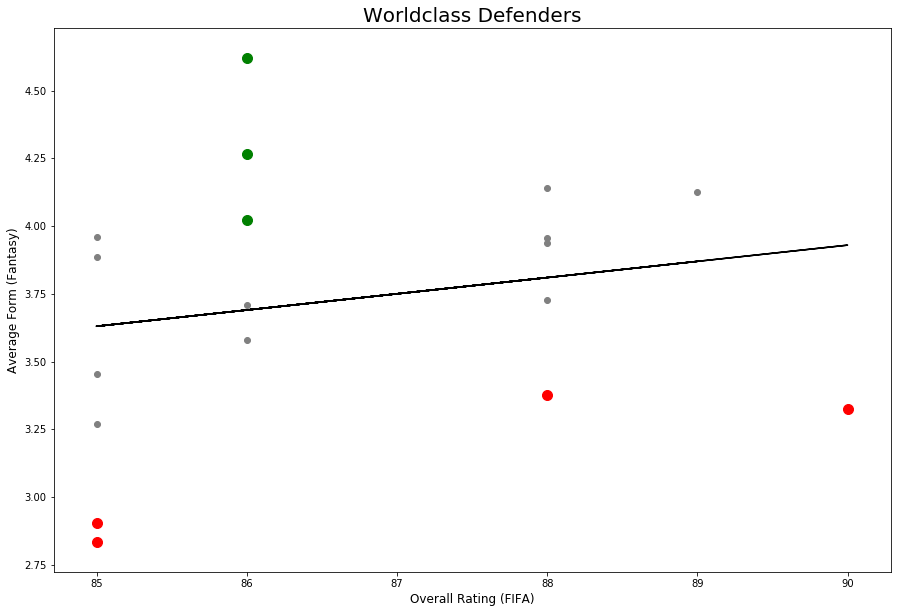

In [360]:
plt.figure(figsize=(15,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(wd1, wd2,color='green',s=100) 
plt.scatter(wd3, wd4,color='red',s=100) 
plt.plot(x, worldclass_defenders_model.predict(x),color='k') 
plt.title('Worldclass Defenders', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show()

## Midfielders

In [361]:
RQ1_Midfielders = RQ1[RQ1['Position'] == 'Midfielder']

In [362]:
average_midfielders = RQ1_Midfielders[RQ1_Midfielders['overall']<85]
worldclass_midfielders = RQ1_Midfielders[RQ1_Midfielders['overall']>84]

In [363]:
w = average_midfielders['overall'].values[:,np.newaxis]
z = average_midfielders['Previous Average Form'].values
average_midfielders_model = LinearRegression()
average_midfielders_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [364]:
x = worldclass_midfielders['overall'].values[:,np.newaxis]
y = worldclass_midfielders['Previous Average Form'].values
worldclass_midfielders_model = LinearRegression()
worldclass_midfielders_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [365]:
average_midfielders["Distance"] = average_midfielders['Previous Average Form'].values - average_midfielders_model.predict(average_midfielders['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [366]:
worldclass_midfielders["Distance"] = worldclass_midfielders['Previous Average Form'].values - worldclass_midfielders_model.predict(worldclass_midfielders['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [367]:
pos_dist_mid0 = average_midfielders[average_midfielders['Distance']>=0]['Distance'].mean()
pos_dist_mid1 = worldclass_midfielders[worldclass_midfielders['Distance']>=0]['Distance'].mean()

In [368]:
neg_dist_mid0 = average_midfielders[average_midfielders['Distance']<0]['Distance'].mean()
neg_dist_mid1 = worldclass_midfielders[worldclass_midfielders['Distance']<0]['Distance'].mean()

In [369]:
underrated_average_mid = average_midfielders[average_midfielders['Distance']>(pos_dist_mid0*2)]
underrated_worldclass_mid = worldclass_midfielders[worldclass_midfielders['Distance']>pos_dist_mid1]

In [370]:
overrated_average_mid = average_midfielders[average_midfielders['Distance']<(neg_dist_mid0*2)]
overrated_worldclass_mid = worldclass_midfielders[worldclass_midfielders['Distance']<neg_dist_mid1]

In [371]:
underrated_average_mid['Predicted Form'] = average_midfielders_model.predict(underrated_average_mid['overall'].values[:,np.newaxis])
underrated_worldclass_mid['Predicted Form'] = worldclass_midfielders_model.predict(underrated_worldclass_mid['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [372]:
overrated_average_mid['Predicted Form'] = average_midfielders_model.predict(overrated_average_mid['overall'].values[:,np.newaxis])
overrated_worldclass_mid['Predicted Form'] = worldclass_midfielders_model.predict(overrated_worldclass_mid['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [373]:
underrated_midfielders = pd.concat([underrated_average_mid ,underrated_worldclass_mid ],axis=0)

In [374]:
overrated_midfielders = pd.concat([overrated_average_mid ,overrated_worldclass_mid ],axis=0)

In [375]:
am1 = underrated_average_mid['overall'].values[:,np.newaxis] 
am2 = underrated_average_mid['Previous Average Form'].values 
am3 = overrated_average_mid['overall'].values[:,np.newaxis] 
am4 = overrated_average_mid['Previous Average Form'].values 

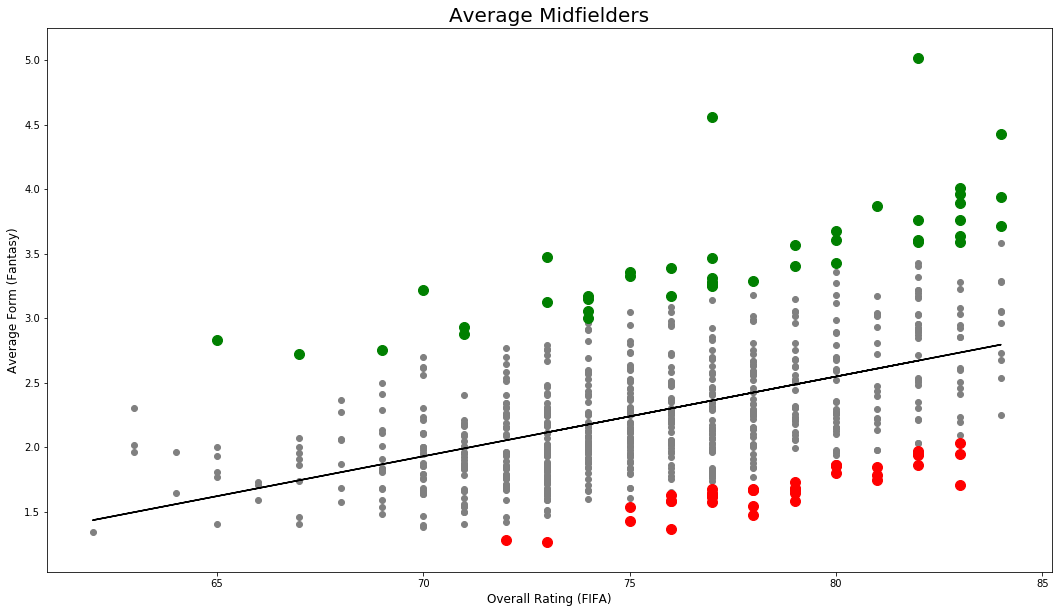

In [376]:
plt.figure(figsize=(18,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(am1, am2,color='green',s=100) 
plt.scatter(am3, am4,color='red',s=100) 
plt.plot(w, average_midfielders_model.predict(w),color='k') 
plt.title('Average Midfielders', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show() 

In [377]:
wm1 = underrated_worldclass_mid['overall'].values[:,np.newaxis] 
wm2 = underrated_worldclass_mid['Previous Average Form'].values 
wm3 = overrated_worldclass_mid['overall'].values[:,np.newaxis] 
wm4 = overrated_worldclass_mid['Previous Average Form'].values

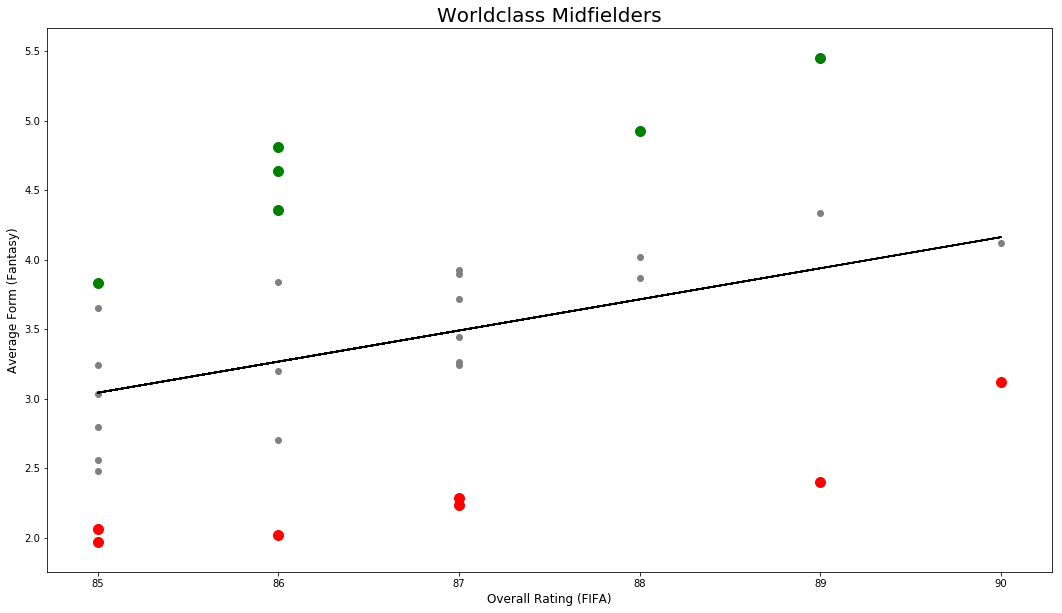

In [378]:
plt.figure(figsize=(18,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(wm1, wm2,color='green',s=100) 
plt.scatter(wm3, wm4,color='red',s=100) 
plt.plot(x, worldclass_midfielders_model.predict(x),color='k') 
plt.title('Worldclass Midfielders', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show()

## Forwards

In [379]:
RQ1_Forwards = RQ1[RQ1['Position'] == 'Forward']

In [380]:
average_forwards = RQ1_Forwards[RQ1_Forwards['overall']<85]
worldclass_forwards = RQ1_Forwards[RQ1_Forwards['overall']>84]

In [381]:
w = average_forwards['overall'].values[:,np.newaxis]
z = average_forwards['Previous Average Form'].values
average_forwards_model = LinearRegression()
average_forwards_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [382]:
x = worldclass_forwards['overall'].values[:,np.newaxis]
y = worldclass_forwards['Previous Average Form'].values
worldclass_forwards_model = LinearRegression()
worldclass_forwards_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [383]:
average_forwards["Distance"] = average_forwards['Previous Average Form'].values - average_forwards_model.predict(average_forwards['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [384]:
worldclass_forwards["Distance"] = worldclass_forwards['Previous Average Form'].values - worldclass_forwards_model.predict(worldclass_forwards['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [385]:
pos_dist_fwd0 = average_forwards[average_forwards['Distance']>=0]['Distance'].mean()
pos_dist_fwd1 = worldclass_forwards[worldclass_forwards['Distance']>=0]['Distance'].mean()

In [386]:
neg_dist_fwd0 = average_forwards[average_forwards['Distance']<0]['Distance'].mean()
neg_dist_fwd1 = worldclass_forwards[worldclass_forwards['Distance']<0]['Distance'].mean()

In [387]:
underrated_average_fwd = average_forwards[average_forwards['Distance']>(pos_dist_mid0*2)]
underrated_worldclass_fwd = worldclass_forwards[worldclass_forwards['Distance']>pos_dist_mid1]

In [388]:
overrated_average_fwd = average_forwards[average_forwards['Distance']<(neg_dist_mid0*2)]
overrated_worldclass_fwd = worldclass_forwards[worldclass_forwards['Distance']<neg_dist_mid1]

In [389]:
underrated_average_fwd['Predicted Form'] = average_forwards_model.predict(underrated_average_fwd['overall'].values[:,np.newaxis])
underrated_worldclass_fwd['Predicted Form'] = worldclass_forwards_model.predict(underrated_worldclass_fwd['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [390]:
overrated_average_fwd['Predicted Form'] = average_forwards_model.predict(overrated_average_fwd['overall'].values[:,np.newaxis])
overrated_worldclass_fwd['Predicted Form'] = worldclass_forwards_model.predict(overrated_worldclass_fwd['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [391]:
underrated_forwards = pd.concat([underrated_average_fwd ,underrated_worldclass_fwd ],axis=0)

In [392]:
overrated_forwards = pd.concat([overrated_average_fwd ,overrated_worldclass_fwd ],axis=0)

In [393]:
af1 = underrated_average_fwd['overall'].values[:,np.newaxis] 
af2 = underrated_average_fwd['Previous Average Form'].values 
af3 = overrated_average_fwd['overall'].values[:,np.newaxis] 
af4 = overrated_average_fwd['Previous Average Form'].values 

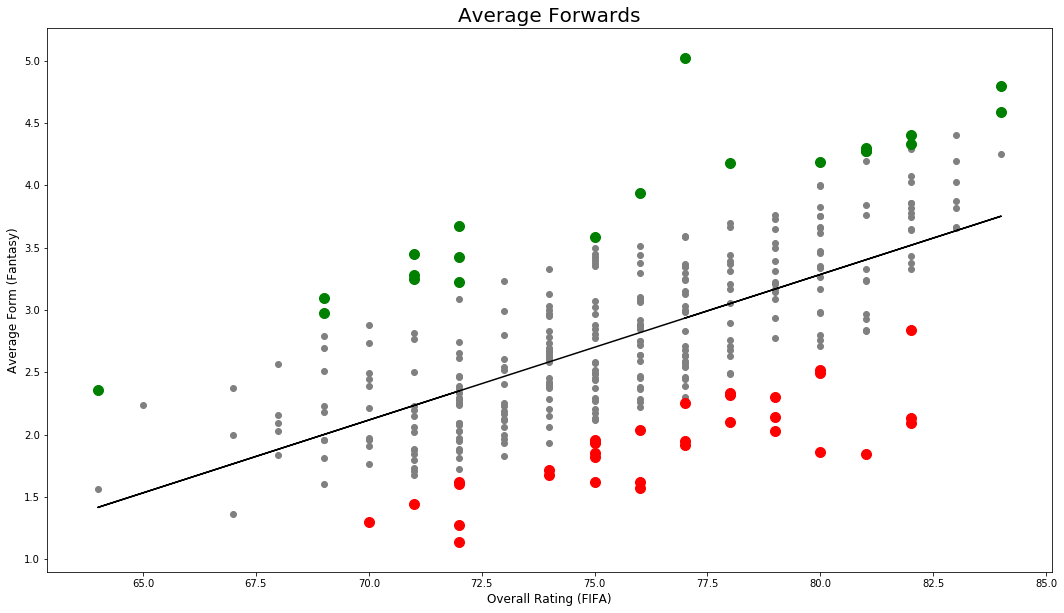

In [394]:
plt.figure(figsize=(18,10))
plt.scatter(w, z,color='grey') 
plt.scatter(af1, af2,color='green',s=100) 
plt.scatter(af3, af4,color='red',s=100) 
plt.plot(w, average_forwards_model.predict(w),color='k') 
plt.title('Average Forwards', fontsize=20)
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.savefig('../../data/analysis/Average Forwards.png')
plt.show() 

In [395]:
wf1 = underrated_worldclass_fwd['overall'].values[:,np.newaxis] 
wf2 = underrated_worldclass_fwd['Previous Average Form'].values 
wf3 = overrated_worldclass_fwd['overall'].values[:,np.newaxis] 
wf4 = overrated_worldclass_fwd['Previous Average Form'].values

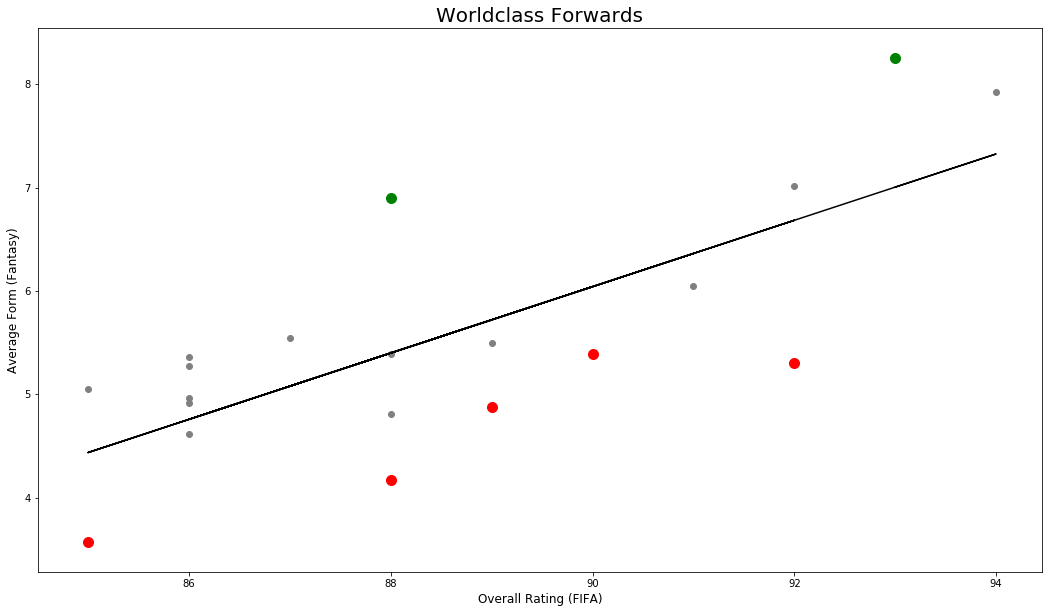

In [396]:
plt.figure(figsize=(18,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(wf1, wf2,color='green',s=100) 
plt.scatter(wf3, wf4,color='red',s=100) 
plt.plot(x, worldclass_forwards_model.predict(x),color='k') 
plt.title('Worldclass Forwards', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.savefig('../../data/analysis/World Class Forwards.png')
plt.show()

## Which is more accurate at predicting real-life form: Underrated Players

In [397]:
underrated_players = pd.concat([underrated_goalkeepers,underrated_defenders,underrated_midfielders,underrated_forwards], axis=0).reset_index().drop('index',1)

In [398]:
underrated_players = underrated_players[underrated_players['Apps This Season']>0]

In [399]:
underrated_players['FIFA Rating Distance'] = abs(underrated_players['Current Average Form'] - underrated_players['Predicted Form'])
underrated_players['Previous Form Distance'] = abs(underrated_players['Current Average Form'] - underrated_players['Previous Average Form'])
underrated_players['Difference'] = abs(underrated_players['FIFA Rating Distance'] - underrated_players['Previous Form Distance'])

In [400]:
underrated_players.loc[underrated_players['FIFA Rating Distance']<underrated_players['Previous Form Distance'],'Verdict'] = 'FIFA Rating'
underrated_players.loc[underrated_players['FIFA Rating Distance']>underrated_players['Previous Form Distance'],'Verdict'] = 'Previous Form'
underrated_players.loc[underrated_players['FIFA Rating Distance'] == underrated_players['Previous Form Distance'],'Verdict'] = 'Equal'

In [401]:
x = underrated_players['Verdict'].value_counts()

Text(0.5,1,'Underrated Verdict')

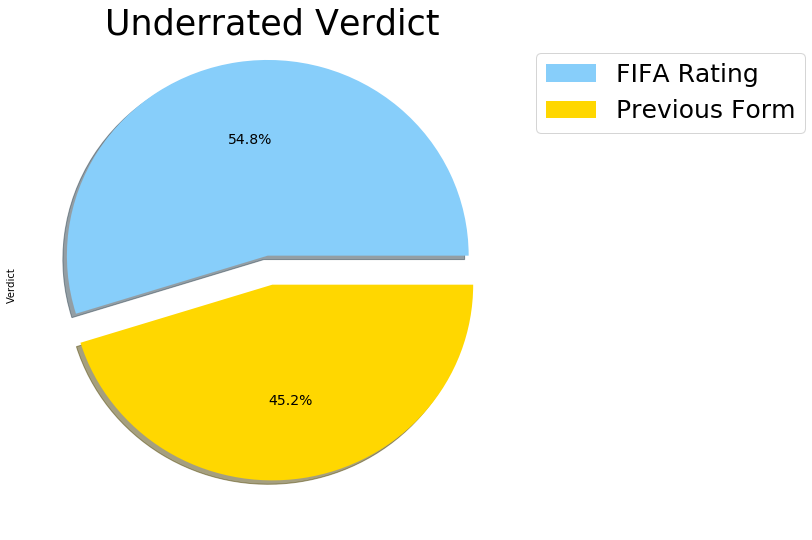

In [402]:
explode = (0.15, 0)
labels = ['','']
x.plot(subplots=True,kind='pie',figsize=(9,9),fontsize=14,explode=explode,autopct='%1.1f%%',shadow=True,labels=labels,colors=['lightskyblue','gold'],labeldistance=1.4)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':25},labels=x.index)
plt.gca().set_title('',color='white',fontsize=30)
plt.title('Underrated Verdict',fontsize=35,color='Black')

In [403]:
underrated_players = underrated_players[underrated_players['Verdict']=='Previous Form']
underrated_players = underrated_players.sort_values('Difference', ascending=False).reset_index().drop('index',1)

In [404]:
underrated_players.head(10)

,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,fan's_favourite_trait,...,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form,Distance,Predicted Form,FIFA Rating Distance,Previous Form Distance,Difference,Verdict
0,Marco Reus,Midfielder,Borussia Dortmund,German Bundesliga,28,Germany,86,https://cdn.sofifa.org/18/players/188350.png,True,False,...,31.000000,4.806452,8.0,4.875000,1.540520,3.265931,1.609069,0.068548,1.540520,Previous Form
1,Junior Stanislas,Midfielder,Bournemouth,English Premier League,27,England,73,https://cdn.sofifa.org/18/players/189446.png,False,False,...,21.000000,3.476190,19.0,3.473684,1.359537,2.116653,1.357031,0.002506,1.354525,Previous Form
2,Roberto Firmino,Midfielder,Liverpool,English Premier League,25,Brazil,83,https://cdn.sofifa.org/18/players/201942.png,False,False,...,41.250000,3.890909,34.0,4.647059,1.156426,2.734483,1.912576,0.756150,1.156426,Previous Form
3,Sadio Mane,Midfielder,Liverpool,English Premier League,25,Senegal,84,https://cdn.sofifa.org/18/players/208722.png,False,False,...,31.333333,3.936170,27.0,4.370370,1.139904,2.796266,1.574105,0.434200,1.139904,Previous Form
4,Lucas Hernandez,Defender,Atletico Madrid,Spanish Primera Division,21,France,77,https://cdn.sofifa.org/18/players/220814.png,False,False,...,8.666667,3.576923,24.0,4.375000,1.136721,2.440202,1.934798,0.798077,1.136721,Previous Form
5,Nabil Fekir,Midfielder,Olympique Lyonnais,French Ligue 1,23,France,82,https://cdn.sofifa.org/18/players/216594.png,False,False,...,21.250000,3.764706,26.0,5.500000,1.092006,2.672700,2.827300,1.735294,1.092006,Previous Form
6,James Rodriguez,Midfielder,FC Bayern Munich,German Bundesliga,25,Colombia,86,https://cdn.sofifa.org/18/players/198710.png,False,False,...,28.000000,4.357143,21.0,4.428571,1.091212,3.265931,1.162640,0.071429,1.091212,Previous Form
7,Mauro Icardi,Forward,Inter,Italian Serie A,24,Argentina,84,https://cdn.sofifa.org/18/players/201399.png,False,False,...,38.750000,4.793548,30.0,6.466667,1.041475,3.752074,2.714593,1.673118,1.041475,Previous Form
8,Anthony Martial,Midfielder,Manchester United,English Premier League,21,France,82,https://cdn.sofifa.org/18/players/211300.png,False,False,...,29.500000,3.593220,28.0,3.714286,0.920520,2.672700,1.041586,0.121065,0.920520,Previous Form
9,Adem Ljajic,Midfielder,Torino,Italian Serie A,25,Serbia,79,https://cdn.sofifa.org/18/players/190544.png,False,False,...,36.500000,3.404110,24.0,4.000000,0.916759,2.487351,1.512649,0.595890,0.916759,Previous Form


## Which is more accurate at predicting real-life form: Overerrated Players

In [405]:
overrated_players = pd.concat([overrated_goalkeepers,overrated_defenders,overrated_midfielders,overrated_forwards], axis=0).reset_index().drop('index',1)

In [406]:
overrated_players = overrated_players[overrated_players['Apps This Season']>0]

In [407]:
overrated_players['FIFA Rating Distance'] = abs(overrated_players['Current Average Form'] - overrated_players['Predicted Form'])
overrated_players['Previous Form Distance'] = abs(overrated_players['Current Average Form'] - overrated_players['Previous Average Form'])
overrated_players['Difference'] = abs(overrated_players['FIFA Rating Distance'] - overrated_players['Previous Form Distance'])

In [408]:
overrated_players.loc[overrated_players['FIFA Rating Distance']<overrated_players['Previous Form Distance'],'Verdict'] = 'FIFA Rating'
overrated_players.loc[overrated_players['FIFA Rating Distance']>overrated_players['Previous Form Distance'],'Verdict'] = 'Previous Form'
overrated_players.loc[overrated_players['FIFA Rating Distance'] == overrated_players['Previous Form Distance'],'Verdict'] = 'Equal'

In [409]:
y = overrated_players['Verdict'].value_counts()

Text(0.5,1,'Overrated Verdict')

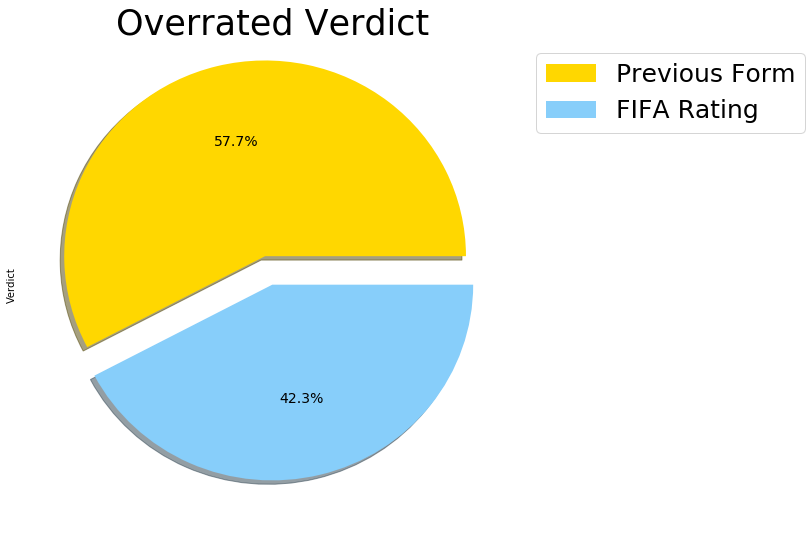

In [410]:
explode = (0.15, 0)
labels = ['','']
y.plot(subplots=True,kind='pie',figsize=(9,9),fontsize=14,explode=explode,autopct='%1.1f%%',shadow=True,labels=labels,colors=['gold','lightskyblue'],labeldistance=1.4)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':25},labels=y.index)
plt.gca().set_title('',color='white',fontsize=30)
plt.title('Overrated Verdict',fontsize=35,color='Black')

In [411]:
overrated_players = overrated_players[overrated_players['Verdict']=='Previous Form']
overrated_players = overrated_players.sort_values('Difference', ascending=False).reset_index().drop('index',1)

In [412]:
overrated_players.head(10)

,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,fan's_favourite_trait,...,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form,Distance,Predicted Form,FIFA Rating Distance,Previous Form Distance,Difference,Verdict
0,Manu Trigueros,Forward,Villarreal CF,Spanish Primera Division,25,Spain,82,https://cdn.sofifa.org/18/players/206545.png,False,False,...,34.250000,2.094891,30.0,2.166667,-1.423461,3.518352,1.351685,0.071776,1.279909,Previous Form
1,Marco Verratti,Midfielder,Paris Saint-Germain,French Ligue 1,24,Italy,87,https://cdn.sofifa.org/18/players/199556.png,False,False,...,33.500000,2.231343,22.0,1.909091,-1.258388,3.489731,1.580641,0.322252,1.258388,Previous Form
2,N'Golo Kante,Midfielder,Chelsea,English Premier League,26,France,87,https://cdn.sofifa.org/18/players/215914.png,False,False,...,36.333333,2.284404,30.0,2.166667,-1.205328,3.489731,1.323065,0.117737,1.205328,Previous Form
3,Luka Modric,Midfielder,Real Madrid CF,Spanish Primera Division,31,Croatia,89,https://cdn.sofifa.org/18/players/177003.png,False,False,...,35.000000,2.400000,23.0,2.608696,-1.537332,3.937332,1.328636,0.208696,1.119941,Previous Form
4,Erik Moran,Forward,CD Leganes,Spanish Primera Division,26,Spain,72,https://cdn.sofifa.org/18/players/201991.png,False,False,...,9.666667,1.275862,6.0,1.000000,-1.073880,2.349742,1.349742,0.275862,1.073880,Previous Form
5,Jorge Mere,Defender,1. FC Koln,German Bundesliga,20,Spain,78,https://cdn.sofifa.org/18/players/223033.png,False,False,...,28.000000,1.339286,20.0,1.400000,-1.182865,2.522151,1.122151,0.060714,1.061437,Previous Form
6,Muhamed Besic,Midfielder,Everton,English Premier League,24,Bosnia Herzegovina,76,https://cdn.sofifa.org/18/players/200765.png,True,False,...,17.500000,1.371429,2.0,1.000000,-0.930574,2.302002,1.302002,0.371429,0.930574,Previous Form
7,Nordin Amrabat,Forward,CD Leganes,Spanish Primera Division,30,Morocco,79,https://cdn.sofifa.org/18/players/183108.png,False,False,...,25.000000,2.300000,30.0,1.944444,-0.867769,3.167769,1.223324,0.355556,0.867769,Previous Form
8,Tobias Strobl,Defender,Borussia Monchengladbach,German Bundesliga,27,Germany,76,https://cdn.sofifa.org/18/players/207894.png,False,False,...,27.250000,1.513761,2.0,0.000000,-0.844491,2.358253,2.358253,1.513761,0.844491,Previous Form
9,Alexis Sanchez,Forward,Arsenal,English Premier League,28,Chile,89,https://cdn.sofifa.org/18/players/184941.png,False,False,...,41.500000,4.879518,28.0,3.928571,-0.841256,5.720774,1.792202,0.950947,0.841256,Previous Form


## Reasons for players being over/underrated 

In [413]:
underrated_goalkeepers = underrated_players[underrated_players['Position'] == 'Goalkeeper']
underrated_defenders = underrated_players[underrated_players['Position'] == 'Defender']
underrated_midfielders = underrated_players[underrated_players['Position'] == 'Midfielder']
underrated_forwards = underrated_players[underrated_players['Position'] == 'Forward']

In [414]:
overrated_goalkeepers = overrated_players[overrated_players['Position'] == 'Goalkeeper']
overrated_defenders = overrated_players[overrated_players['Position'] == 'Defender']
overrated_midfielders = overrated_players[overrated_players['Position'] == 'Midfielder']
overrated_forwards = overrated_players[overrated_players['Position'] == 'Forward']

#### 1. Age

In [415]:
age = pd.DataFrame(columns = ['Goalkeepers','Defenders','Midfielders','Forwards'])
age.set_value('All','Goalkeepers',RQ1_Goalkeepers.mean()['age'])
age.set_value('Overrated ','Goalkeepers',overrated_goalkeepers.mean()['age'])
age.set_value('Underrated','Goalkeepers',underrated_goalkeepers.mean()['age'])
age.set_value('All','Defenders',RQ1_Defenders.mean()['age'])
age.set_value('Overrated ','Defenders',overrated_defenders.mean()['age'])
age.set_value('Underrated','Defenders',underrated_defenders.mean()['age'])
age.set_value('All','Midfielders',RQ1_Midfielders.mean()['age'])
age.set_value('Overrated ','Midfielders',overrated_midfielders.mean()['age'])
age.set_value('Underrated','Midfielders',underrated_midfielders.mean()['age'])
age.set_value('All','Forwards',RQ1_Forwards.mean()['age'])
age.set_value('Overrated ','Forwards',overrated_forwards.mean()['age'])
age.set_value('Underrated','Forwards',underrated_forwards.mean()['age'])

,Goalkeepers,Defenders,Midfielders,Forwards
All,30.0977,28.3292,27.4818,27.3324
Overrated,NaN,26.8571,25.88,25.3846
Underrated,29.5,25.75,25.8824,27


In [416]:
age.transpose()

,All,Overrated,Underrated
Goalkeepers,30.0977,NaN,29.5
Defenders,28.3292,26.8571,25.75
Midfielders,27.4818,25.88,25.8824
Forwards,27.3324,25.3846,27


#### 2. Apps

In [417]:
apps = pd.DataFrame(columns = ["All Players","Underrated Players", "Overrated Players"])
apps.set_value('Average Apps/Season','All Players',RQ1.mean()['Average Apps/Season'])
apps.set_value('Average Apps/Season','Underrated Players',underrated_players.mean()['Average Apps/Season'])
apps.set_value('Average Apps/Season','Overrated Players',overrated_players.mean()['Average Apps/Season'])
apps.set_value('Apps This Season','All Players',RQ1.mean()['Apps This Season'])
apps.set_value('Apps This Season','Underrated Players',underrated_players.mean()['Apps This Season'])
apps.set_value('Apps This Season','Overrated Players',overrated_players.mean()['Apps This Season'])

,All Players,Underrated Players,Overrated Players
Average Apps/Season,29.0289,28.0657,30.5278
Apps This Season,13.8805,23.5152,20.9556


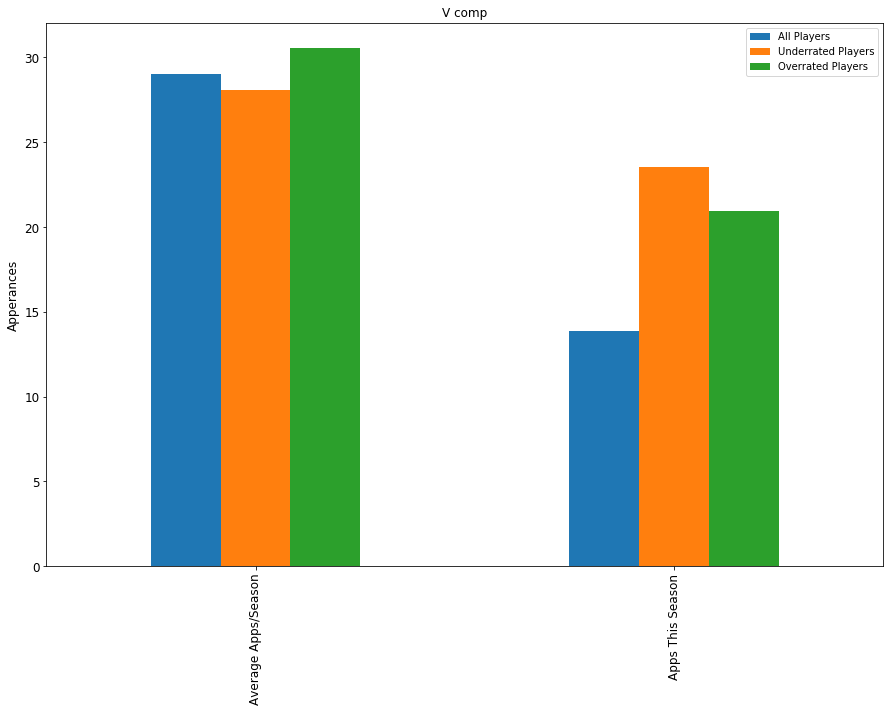

In [418]:
ax = apps.plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Apperances", fontsize=12)
plt.show()

#### 3. Position

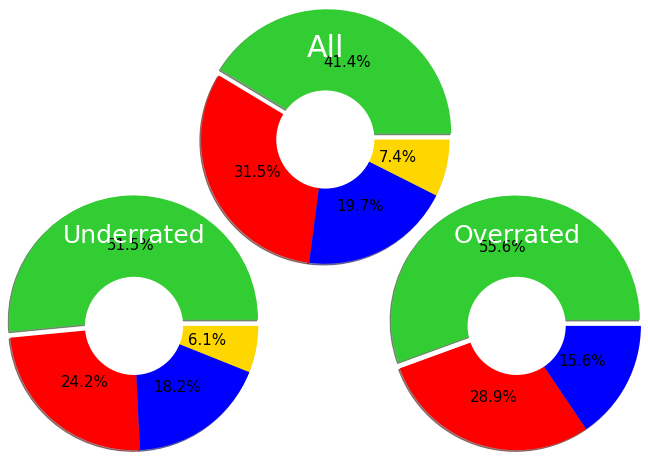

In [419]:
mpl.rcParams['font.size'] = 15
the_grid = GridSpec(6,6)

RQ1['Position'].value_counts().plot(figsize=(20,20))

plt.subplot(the_grid[3, 3], aspect=1)
explode2 = (0.1, 0,0,0)
plt.pie(RQ1['Position'].value_counts(),labels=['','','',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r','blue','gold'],explode=explode2)
plt.gca().set_title('All',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[4, 2], aspect=1)
explode2 = (0.1, 0,0,0)
plt.pie(underrated_players['Position'].value_counts(),labels=['','','',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r','blue','gold'],explode=explode2)
plt.gca().set_title('Underrated',color='white',fontsize=25)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[4, 4], aspect=1)
explode2 = (0.1, 0,0)
plt.pie(overrated_players['Position'].value_counts(),labels=['','',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r','blue','gold'],explode=explode2)
plt.gca().set_title('Overrated',color='white',fontsize=25)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#### 4. Injury Prone

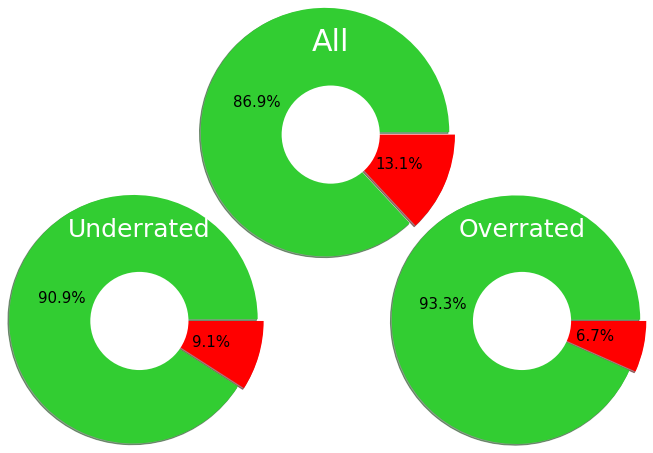

In [420]:
mpl.rcParams['font.size'] = 15
the_grid = GridSpec(6,6)

RQ1['injury_prone_trait'].plot(figsize=(20,20))

plt.subplot(the_grid[3, 3], aspect=1)
explode2 = (0.1, 0)
plt.pie(RQ1['injury_prone_trait'].value_counts(),labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode2)
plt.gca().set_title('All',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[4,2], aspect=1)
explode2 = (0.1, 0)
plt.pie(underrated_players['injury_prone_trait'].value_counts(),labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode2)
plt.gca().set_title('Underrated',color='white',fontsize=25)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[4, 4], aspect=1)
explode2 = (0.1, 0)
plt.pie(overrated_players['injury_prone_trait'].value_counts(),labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode2)
plt.gca().set_title('Overrated',color='white',fontsize=25)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#### 5. Homegrown

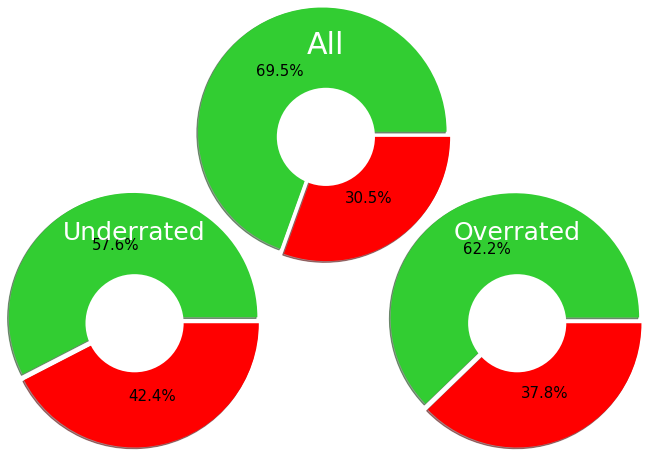

In [421]:
mpl.rcParams['font.size'] = 15
the_grid = GridSpec(6,6)

RQ1['Homegrown'].plot(figsize=(20,20))

plt.subplot(the_grid[3, 3], aspect=1)
explode2 = (0.1, 0)
plt.pie(RQ1['Homegrown'].value_counts(),labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode2)
plt.gca().set_title('All',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[4, 2], aspect=1)
explode2 = (0.1, 0)
plt.pie(underrated_players['Homegrown'].value_counts(),labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode2)
plt.gca().set_title('Underrated',color='white',fontsize=25)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[4, 4], aspect=1)
explode2 = (0.1, 0)
plt.pie(overrated_players['Homegrown'].value_counts(),labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode2)
plt.gca().set_title('Overrated',color='white',fontsize=25)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Under/Overrated XI's


In [422]:
underrated_goalkeepers = underrated_players[underrated_players['Position']=='Goalkeeper']
underrated_defenders = underrated_players[underrated_players['Position']=='Defender']
underrated_midfielders = underrated_players[underrated_players['Position']=='Midfielder']
underrated_forwards = underrated_players[underrated_players['Position']=='Forward']

In [423]:
underrated_goalkeepers = underrated_goalkeepers.sort_values('Difference',ascending=False)
underrated_goalkeeper = underrated_goalkeepers.head(1)

underrated_defenders = underrated_defenders.sort_values('Difference',ascending=False)
underrated_defender = underrated_defenders.head(4)


underrated_midfielders = underrated_midfielders.sort_values('Difference',ascending=False)
underrated_midfielder = underrated_midfielders.head(4)


underrated_forwards = underrated_forwards.sort_values('Difference',ascending=False)
underrated_forward = underrated_forwards.head(2)

underrated_XI= pd.concat([underrated_goalkeeper,underrated_defender,underrated_midfielder,underrated_forward])

In [424]:
underrated_XI['photo'] = underrated_XI['photo'].replace('/18/','/1x/18/', regex=True)
underrated_XI = underrated_XI.reset_index()
underrated_XI['Predicted Form'] = underrated_XI['Predicted Form'].round(2)
underrated_XI['Predicted Form'] = underrated_XI['Predicted Form'].astype(str)
Squad_Rating = underrated_XI['overall'].sum()/11
Squad_Rating = str(Squad_Rating)

In [425]:
underrated_XI.round(2)

,index,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,...,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form,Distance,Predicted Form,FIFA Rating Distance,Previous Form Distance,Difference,Verdict
0,20,Jan Oblak,Goalkeeper,Atletico Madrid,Spanish Primera Division,24,Slovenia,88,https://cdn.sofifa.org/1x/18/players/200389.png,False,...,26.33,4.22,34.0,4.59,0.75,3.46,1.13,0.37,0.75,Previous Form
1,4,Lucas Hernandez,Defender,Atletico Madrid,Spanish Primera Division,21,France,77,https://cdn.sofifa.org/1x/18/players/220814.png,False,...,8.67,3.58,24.0,4.38,1.14,2.44,1.93,0.80,1.14,Previous Form
2,16,Issa Cissokho,Defender,Amiens SC Football,French Ligue 1,32,Senegal,71,https://cdn.sofifa.org/1x/18/players/138704.png,False,...,23.00,2.86,17.0,2.82,0.91,1.95,0.88,0.04,0.84,Previous Form
3,17,Fabinho,Defender,AS Monaco,French Ligue 1,23,Brazil,83,https://cdn.sofifa.org/1x/18/players/209499.png,False,...,33.75,3.79,31.0,3.77,0.85,2.93,0.84,0.01,0.83,Previous Form
4,21,Jose Maria Gimenez,Defender,Atletico Madrid,Spanish Primera Division,22,Uruguay,83,https://cdn.sofifa.org/1x/18/players/216460.png,False,...,16.00,3.84,21.0,3.76,0.91,2.93,0.83,0.08,0.75,Previous Form
5,0,Marco Reus,Midfielder,Borussia Dortmund,German Bundesliga,28,Germany,86,https://cdn.sofifa.org/1x/18/players/188350.png,True,...,31.00,4.81,8.0,4.88,1.54,3.27,1.61,0.07,1.54,Previous Form
6,1,Junior Stanislas,Midfielder,Bournemouth,English Premier League,27,England,73,https://cdn.sofifa.org/1x/18/players/189446.png,False,...,21.00,3.48,19.0,3.47,1.36,2.12,1.36,0.00,1.35,Previous Form
7,2,Roberto Firmino,Midfielder,Liverpool,English Premier League,25,Brazil,83,https://cdn.sofifa.org/1x/18/players/201942.png,False,...,41.25,3.89,34.0,4.65,1.16,2.73,1.91,0.76,1.16,Previous Form
8,3,Sadio Mane,Midfielder,Liverpool,English Premier League,25,Senegal,84,https://cdn.sofifa.org/1x/18/players/208722.png,False,...,31.33,3.94,27.0,4.37,1.14,2.8,1.57,0.43,1.14,Previous Form
9,7,Mauro Icardi,Forward,Inter,Italian Serie A,24,Argentina,84,https://cdn.sofifa.org/1x/18/players/201399.png,False,...,38.75,4.79,30.0,6.47,1.04,3.75,2.71,1.67,1.04,Previous Form


In [426]:
JoinedUnderratedImages = underrated_XI['photo'].as_matrix() 
GK1 = mpimg.imread(JoinedUnderratedImages [0]) 
DF1 = mpimg.imread(JoinedUnderratedImages [1]) 
DF2 = mpimg.imread(JoinedUnderratedImages [2]) 
DF3 = mpimg.imread(JoinedUnderratedImages [3]) 
DF4 = mpimg.imread(JoinedUnderratedImages [4]) 
MD1 = mpimg.imread(JoinedUnderratedImages [5]) 
MD2 = mpimg.imread(JoinedUnderratedImages [6]) 
MD3 = mpimg.imread(JoinedUnderratedImages [7]) 
MD4 = mpimg.imread(JoinedUnderratedImages [8]) 
FW1 = mpimg.imread(JoinedUnderratedImages [9]) 
FW2 = mpimg.imread(JoinedUnderratedImages [10])

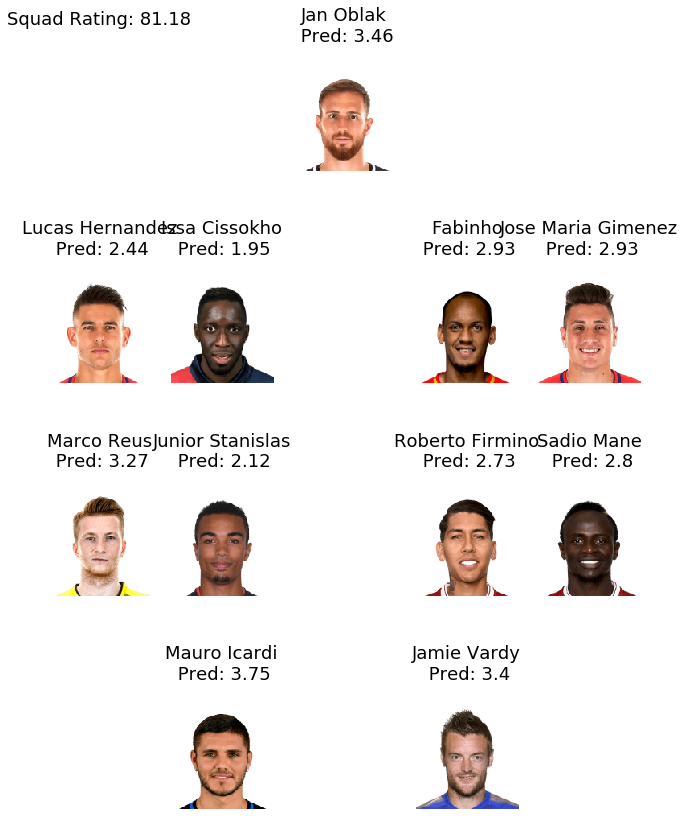

In [427]:
f, axarr = plt.subplots(4,7,figsize=(15,15))
fig = plt.figure()
axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)


axarr[0,2].set_title('Squad Rating: ' + Squad_Rating[:5])
axarr[0,2].axis('off')

axarr[0,4].imshow(GK1)
axarr[0,4].set_title(underrated_XI['Players'].loc[0] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[0] + '\n' ) 
axarr[0,4].axis('off')


axarr[1,2].imshow(DF1)
axarr[1,2].set_title(underrated_XI['Players'].loc[1] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[1] + '\n' ) 
axarr[1,2].axis('off')


axarr[1,3].imshow(DF2)
axarr[1,3].set_title(underrated_XI['Players'].loc[2] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[2] + '\n')
axarr[1,3].axis('off')


axarr[1,5].imshow(DF3)
axarr[1,5].set_title(underrated_XI['Players'].loc[3] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[3] + '\n') 
axarr[1,5].axis('off')


axarr[1,6].imshow(DF4)
axarr[1,6].set_title(underrated_XI['Players'].loc[4] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[4] + '\n') 
axarr[1,6].axis('off')


axarr[2,2].imshow(MD1)
axarr[2,2].set_title(underrated_XI['Players'].loc[5] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[5] + '\n') 
axarr[2,2].axis('off')


axarr[2,3].imshow(MD2)
axarr[2,3].set_title(underrated_XI['Players'].loc[6] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[6] + '\n') 
axarr[2,3].axis('off')


axarr[2,5].imshow(MD3)
axarr[2,5].set_title(underrated_XI['Players'].loc[7] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[7] + '\n') 
axarr[2,5].axis('off')


axarr[2,6].imshow(MD4)
axarr[2,6].set_title(underrated_XI['Players'].loc[8] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[8] + '\n') 
axarr[2,6].axis('off')


axarr[3,3].imshow(FW1)
axarr[3,3].set_title(underrated_XI['Players'].loc[9] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[9] + '\n') 
axarr[3,3].axis('off')

axarr[3,5].imshow(FW2)
axarr[3,5].set_title(underrated_XI['Players'].loc[10] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[10] + '\n') 
axarr[3,5].axis('off')


f.savefig('../../data/analysis/Underrated_XI.png')


In [428]:
overrated_goalkeepers = overrated_players[overrated_players['Position']=='Goalkeeper']
overrated_defenders = overrated_players[overrated_players['Position']=='Defender']
overrated_midfielders = overrated_players[overrated_players['Position']=='Midfielder']
overrated_forwards = overrated_players[overrated_players['Position']=='Forward']

In [429]:
overrated_goalkeepers = overrated_goalkeepers.sort_values('Difference',ascending=False)
overrated_goalkeeper = overrated_goalkeepers.head(1)

overrated_defenders = overrated_defenders.sort_values('Difference',ascending=False)
overrated_defender = overrated_defenders.head(4)


overrated_midfielders = overrated_midfielders.sort_values('Difference',ascending=False)
overrated_midfielder = overrated_midfielders.head(4)


overrated_forwards = overrated_forwards.sort_values('Difference',ascending=False)
overrated_forward = overrated_forwards.head(2)

overrated_XI= pd.concat([overrated_goalkeeper,overrated_defender,overrated_midfielder,overrated_forward])

In [430]:
overrated_XI['photo'] = overrated_XI['photo'].replace('/18/','/1x/18/', regex=True)
overrated_XI = overrated_XI.reset_index()
overrated_XI['Predicted Form'] = overrated_XI['Predicted Form'].round(2)
overrated_XI['Predicted Form'] = overrated_XI['Predicted Form'].astype(str)
Squad_Rating = overrated_XI['overall'].sum()/11
Squad_Rating = str(Squad_Rating)

In [431]:
overrated_XI.round(2)

,index,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,...,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form,Distance,Predicted Form,FIFA Rating Distance,Previous Form Distance,Difference,Verdict
0,5,Jorge Mere,Defender,1. FC Koln,German Bundesliga,20,Spain,78,https://cdn.sofifa.org/1x/18/players/223033.png,False,...,28.00,1.34,20.0,1.40,-1.18,2.52,1.12,0.06,1.06,Previous Form
1,8,Tobias Strobl,Defender,Borussia Monchengladbach,German Bundesliga,27,Germany,76,https://cdn.sofifa.org/1x/18/players/207894.png,False,...,27.25,1.51,2.0,0.00,-0.84,2.36,2.36,1.51,0.84,Previous Form
2,18,Ximo Navarro,Defender,UD Las Palmas,Spanish Primera Division,27,Spain,75,https://cdn.sofifa.org/1x/18/players/198023.png,False,...,44.00,1.52,27.0,1.26,-0.75,2.28,1.02,0.26,0.75,Previous Form
3,22,Raphael Varane,Defender,Real Madrid CF,Spanish Primera Division,24,France,85,https://cdn.sofifa.org/1x/18/players/201535.png,False,...,26.25,2.90,25.0,2.80,-0.73,3.63,0.83,0.10,0.73,Previous Form
4,1,Marco Verratti,Midfielder,Paris Saint-Germain,French Ligue 1,24,Italy,87,https://cdn.sofifa.org/1x/18/players/199556.png,False,...,33.50,2.23,22.0,1.91,-1.26,3.49,1.58,0.32,1.26,Previous Form
5,2,N'Golo Kante,Midfielder,Chelsea,English Premier League,26,France,87,https://cdn.sofifa.org/1x/18/players/215914.png,False,...,36.33,2.28,30.0,2.17,-1.21,3.49,1.32,0.12,1.21,Previous Form
6,3,Luka Modric,Midfielder,Real Madrid CF,Spanish Primera Division,31,Croatia,89,https://cdn.sofifa.org/1x/18/players/177003.png,False,...,35.00,2.40,23.0,2.61,-1.54,3.94,1.33,0.21,1.12,Previous Form
7,6,Muhamed Besic,Midfielder,Everton,English Premier League,24,Bosnia Herzegovina,76,https://cdn.sofifa.org/1x/18/players/200765.png,True,...,17.50,1.37,2.0,1.00,-0.93,2.3,1.30,0.37,0.93,Previous Form
8,0,Manu Trigueros,Forward,Villarreal CF,Spanish Primera Division,25,Spain,82,https://cdn.sofifa.org/1x/18/players/206545.png,False,...,34.25,2.09,30.0,2.17,-1.42,3.52,1.35,0.07,1.28,Previous Form
9,4,Erik Moran,Forward,CD Leganes,Spanish Primera Division,26,Spain,72,https://cdn.sofifa.org/1x/18/players/201991.png,False,...,9.67,1.28,6.0,1.00,-1.07,2.35,1.35,0.28,1.07,Previous Form


In [432]:
JoinedOverratedImages = overrated_XI['photo'].as_matrix()

QM = mpimg.imread('../../data/raw/blankface.png')
DF1 = mpimg.imread(JoinedOverratedImages [0])
DF2 = mpimg.imread(JoinedOverratedImages [1])
DF3 = mpimg.imread(JoinedOverratedImages [2])
DF4 = mpimg.imread(JoinedOverratedImages [3])
MD1 = mpimg.imread(JoinedOverratedImages [4])
MD2 = mpimg.imread(JoinedOverratedImages [5])
MD3 = mpimg.imread(JoinedOverratedImages [6])
MD4 = mpimg.imread(JoinedOverratedImages [7])
FW1 = mpimg.imread(JoinedOverratedImages [8])
FW2 = mpimg.imread(JoinedOverratedImages [9])

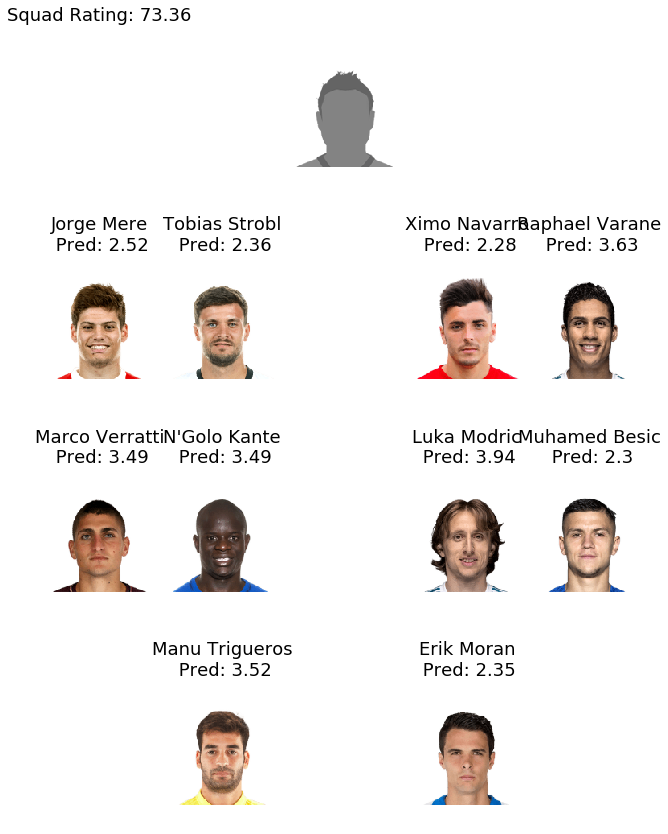

In [433]:
f, axarr = plt.subplots(4,7,figsize=(15,15))
fig = plt.figure()

axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)


axarr[0,2].set_title('Squad Rating: ' + Squad_Rating[:5])
axarr[0,2].axis('off')

axarr[0,4].imshow(QM)
axarr[0,4].axis('off')

axarr[1,2].imshow(DF1)
axarr[1,2].set_title(overrated_XI['Players'].loc[0] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[0] + '\n') 
axarr[1,2].axis('off')


axarr[1,3].imshow(DF2)
axarr[1,3].set_title(overrated_XI['Players'].loc[1] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[1] + '\n')
axarr[1,3].axis('off')


axarr[1,5].imshow(DF3)
axarr[1,5].set_title(overrated_XI['Players'].loc[2] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[2] + '\n') 

axarr[1,5].axis('off')


axarr[1,6].imshow(DF4)
axarr[1,6].set_title(overrated_XI['Players'].loc[3] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[3] + '\n') 
axarr[1,6].axis('off')


axarr[2,2].imshow(MD1)
axarr[2,2].set_title(overrated_XI['Players'].loc[4] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[4] + '\n') 

axarr[2,2].axis('off')


axarr[2,3].imshow(MD2)
axarr[2,3].set_title(overrated_XI['Players'].loc[5] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[5] + '\n') 
axarr[2,3].axis('off')


axarr[2,5].imshow(MD3)
axarr[2,5].set_title(overrated_XI['Players'].loc[6] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[6] + '\n') 
axarr[2,5].axis('off')


axarr[2,6].imshow(MD4)
axarr[2,6].set_title(overrated_XI['Players'].loc[7] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[7] + '\n') 
axarr[2,6].axis('off')


axarr[3,3].imshow(FW1)
axarr[3,3].set_title(overrated_XI['Players'].loc[8] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[8] + '\n') 
axarr[3,3].axis('off')

axarr[3,5].imshow(FW2)
axarr[3,5].set_title(overrated_XI['Players'].loc[9] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[9] + '\n' ) 
axarr[3,5].axis('off')



f.savefig('../../data/analysis/Overrated_XI.png')